In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
%matplotlib inline

In [2]:
#removing values where gene-id is 0 (unidentified)
data = pd.read_csv('ExpressionR50.csv', header =None)
rows = pd.read_csv('RowsR50.csv')
age = np.array([12, 13, 13, 12, 16, 17, 21, 21, 24, 35, 37])
gene_id = rows.ix[:,2]
data_id = pd.concat([data, gene_id], axis=1)
new_data = data_id[data_id['gene-id']!= 0]
clean_data = new_data.ix[:,:-1]
new_data

,0,1,2,3,4,5,6,7,8,9,10,gene-id
0,2.1039,3.4865,2.3438,2.6535,1.9149,3.4019,3.9780,3.2876,3.9467,3.3072,3.4198,30786
2,6.1532,7.1778,6.5365,6.8227,6.4406,7.5052,7.2353,7.3459,7.4539,7.3443,7.4484,865
3,2.3737,2.8386,2.1724,2.6676,2.2044,2.8495,2.9133,2.9174,2.8335,2.8269,2.8689,34129
4,0.8133,2.5186,1.8037,1.7742,0.8331,2.3178,2.9540,2.5963,2.9586,3.1302,3.4110,81016
5,2.3806,2.6172,2.2394,2.3388,1.8360,3.1963,3.5848,3.4812,3.3278,3.0575,3.1573,34829
7,3.3131,3.9889,3.3275,3.6227,3.4906,3.9447,3.8989,3.9013,3.9316,3.6589,3.8493,34913
8,1.3765,1.8973,1.8599,1.5359,0.9552,2.1471,2.7298,1.9509,2.3754,2.5479,2.4115,1021095
12,0.0144,0.1250,0.0623,0.0339,0.0087,0.1914,0.2187,0.1756,0.2484,0.2386,0.2998,171002
13,0.2787,0.3429,0.1765,0.3772,0.0217,0.5084,0.8111,0.2865,0.8912,0.5767,0.5257,80267
14,0.0000,0.0937,0.0000,0.0186,0.0000,0.0449,0.0725,0.0178,0.0926,0.0347,0.0392,7591


In [3]:
#running DBSCAN
db = DBSCAN(eps=0.03, min_samples=10).fit(clean_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 1


/Users/Ber/anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


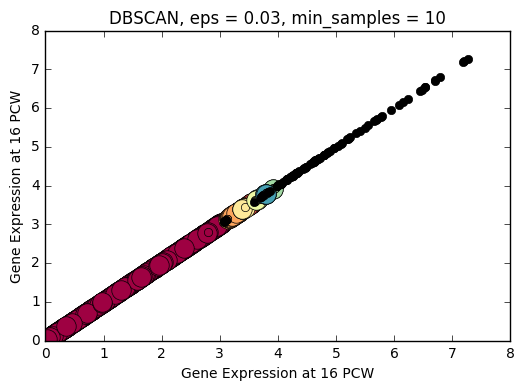

In [27]:
#plotting DBSCAN on the diagonal 
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = clean_data[class_member_mask & core_samples_mask].values
    plt.plot(xy[:, 4], xy[:, 4], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = clean_data[class_member_mask & ~core_samples_mask].values
    plt.plot(xy[:, 4], xy[:, 4], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)
    plt.xlabel('Gene Expression at 16 PCW')
    plt.ylabel('Gene Expression at 16 PCW')
    plt.title('DBSCAN, eps = 0.03, min_samples = 10')
plt.show()



In [5]:
np.unique(labels)

array([-1,  0])

In [6]:
sixteen = clean_data.ix[:,4]


In [28]:
#DBSCAN on 16 PCW age group only
X = sixteen.reshape(-1, 1)
db = DBSCAN(eps=0.02, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
np.unique(labels)

Estimated number of clusters: 16


array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

/Users/Ber/anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


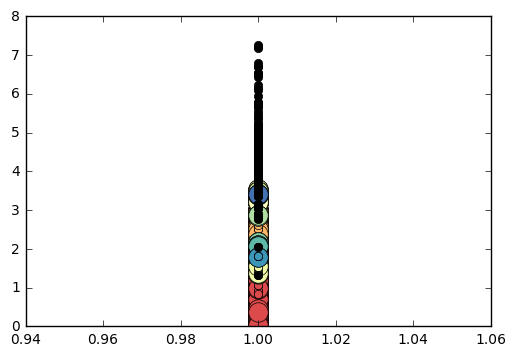

In [22]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'black'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    ones = np.ones(xy.shape)
    plt.plot(ones, xy, 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    
    xy = X[class_member_mask & ~core_samples_mask]
    ones = np.ones(xy.shape)
    plt.plot(ones, xy, 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.show()

In [29]:
sixteen_id = new_data.ix[:, [4,'gene-id']]

In [30]:
labelsDF = pd.DataFrame(labels)

In [31]:
sixteen_labels = pd.concat([sixteen_id, labelsDF], axis=1, ignore_index=True)

In [32]:
sixteen_id2 = sixteen_id.reset_index()
sixteen_id2 = sixteen_id2.ix[:,1:3]

In [33]:
sixteen_labels = pd.concat([sixteen_id2, labelsDF], axis=1)

In [34]:
sixteen_labels

,4,gene-id,0
0,1.9149,30786,0
1,6.4406,865,-1
2,2.2044,34129,1
3,0.8331,81016,2
4,1.8360,34829,0
5,3.4906,34913,10
6,0.9552,1021095,2
7,0.0087,171002,2
8,0.0217,80267,2
9,0.0000,7591,2


In [81]:
#getting Gene ID from individual clusters
c = {}
for a in range(n_clusters_):
    c[a] =  sixteen_labels[sixteen_labels[0]== a].ix[:,1]
c[6].size

62

In [16]:
import os
os.getcwd()

'/Users/Ber/Desktop/BIOL519/SpontaneousActivity'

In [72]:
c[9].to_csv('/Users/Ber/Desktop/BIOL519/SpontaneousActivity/c9.csv')

In [18]:
outliers.to_csv('/Users/Ber/Desktop/BIOL519/SpontaneousActivity/outliers.csv')

c[0]= unclassified
c[1]= N/A
c[2]= 833 genes, Largest fold enrichment: regulation of ion homeostasis, regulation of ion transport
c[3]= unclassified
c[4]= regulation of cytosolic calcium ion concentration
c[5]= unclassified
c[6]= cell to cell signaling; regulation of biological quality
c[7]= unclassified
c[9]= unclassified

